# Fibonacci word fractal

https://en.wikipedia.org/wiki/Fibonacci_word_fractal

The Fibonacci word fractal is a fractal curve defined on the plane from the **Fibonacci word**.

### ------------------ Library ------------------

In [61]:
import numpy as np
import matplotlib.pyplot as plt

### ------------------ Fibonacci word ------------------

In [62]:
ORDER = 5

# ------------------ Fibonacci word ------------------
def fibonacci_word(n: int) -> str:
    """
    Returns the nth Fibonacci word using concatenation:
      F1 = "1", F2 = "0", Fn = F(n-1) + F(n-2).
    The infinite limit begins 0100101001001...
    """
    if n == 0:
        return "0"
    if n == 1:
        return "01"
    a, b = "0", "01"
    for _ in range(2, n+1):
        a, b = b, b + a
    return b


f = fibonacci_word(ORDER)
print(f"Fibonacci word of order {ORDER}: {f}")

Fibonacci word of order 5: 0100101001001


### ------------------ Build polyline by odd-even drawing rule ------------------
Definition:
****
This curve is built iteratively by applying the Odd–Even Drawing rule to the Fibonacci word 0100101001001...:

For each digit at position k:

1.  If the digit is 0:
  * Draw a line segment then turn 90° to the left if k is even
  * Draw a line segment then Turn 90° to the right if k is odd
2.  If the digit is 1:
  * Draw a line segment and stay straight

To a Fibonacci word of length Fn (the nth Fibonacci number) is associated a curve
Fn made of
Fn segments. The curve displays three different aspects whether n is in the form 3k, 3k + 1, or 3k + 2.




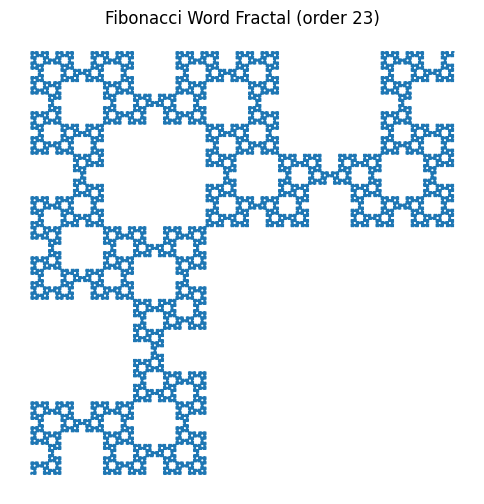

In [63]:
# ------------------ Build polyline by odd-even drawing rule ------------------
def fib_word_curve(word: str, step: float = 1.0, angle_deg: float = 90.0):
    """Apply Odd–Even Drawing Rule to generate curve points from Fibonacci word."""
    theta = 0.0   # heading (radians), initial facing east
    x, y = 0.0, 0.0
    pts = [(x, y)]
    ang = np.deg2rad(angle_deg)

    for k, ch in enumerate(word, start=0):
        # Step forward
        x += step * np.cos(theta)
        y += step * np.sin(theta)
        pts.append((x, y))

        # Apply turning rule if digit is 0
        if ch == "0":
            if k % 2 == 0:   # even
                theta += ang   # left
            else:             # odd
                theta -= ang   # right
        # If ch == "1": no turn

    return np.array(pts)

# Example: draw curve for order n
n = 23
word = fibonacci_word(n)
pts = fib_word_curve(word, 10)

plt.figure(figsize=(6,6))
plt.plot(pts[:,0], pts[:,1], linewidth=1)
plt.axis("equal"); plt.axis("off")
plt.title(f"Fibonacci Word Fractal (order {n})")
plt.show()